# Анализ погрешностей методов численного дифференцирования

## Задание
Построить графики абсолютной погрешности пяти методов численного дифференцирования в зависимости от шага $h_n = \frac{2}{2^n}$, где $n = 1, 2, ..., 21$

In [1]:
import numpy as npimport matplotlib.pyplot as plt%matplotlib inlineclass Function:    def __init__(self, func, deriv, name):        self.func = func        self.deriv = deriv        self.name = nameclass Num_Deriv:    def __init__(self, func, name):        self.func = func        self.name = name# Функцииdef f1(x):    return np.sin(x ** 2)def f2(x):    return np.cos(np.sin(x))def f3(x):    return np.exp(np.sin(np.cos(x)))def f4(x):    return np.log(x + 3)def f5(x):    return np.sqrt(x + 3)# Производныеdef deriv_f1(x):    return 2 * x * np.cos(x ** 2)def deriv_f2(x):    return -np.sin(np.sin(x)) * np.cos(x)def deriv_f3(x):    return -np.sin(x) * np.cos(np.cos(x)) * np.exp(np.sin(np.cos(x)))def deriv_f4(x):    return 1 / (x + 3)def deriv_f5(x):    return 1 / (2 * np.sqrt(x + 3))# Методы численного дифференцированияdef num_deriv_1(f, x, h):    return (f(x + h) - f(x)) / hdef num_deriv_2(f, x, h):    return (f(x) - f(x - h)) / hdef num_deriv_3(f, x, h):    return (f(x + h) - f(x - h)) / (2 * h)def num_deriv_4(f, x, h):    return (4 / 3) * ((f(x + h) - f(x - h)) / (2 * h)) - (1 / 3) * ((f(x + 2 * h) - f(x - 2 * h)) / (4 * h))def num_deriv_5(f, x, h):    return (3 / 2) * ((f(x + h) - f(x - h)) / (2 * h)) - (3 / 5) * ((f(x + 2 * h) - f(x - 2 * h)) / (4 * h)) + (1 / 10) * ((f(x + 3 * h) - f(x - 3 * h)) / (6 * h))# Параметрыx = 1.0h = [(2 / 2 ** i) for i in range(1, 22)]functions = [    Function(f1, deriv_f1, r"$\sin(x^2)$"),    Function(f2, deriv_f2, r"$\cos(\sin(x))$"),    Function(f3, deriv_f3, r"$e^{\sin(\cos(x))}$"),    Function(f4, deriv_f4, r"$\ln(x + 3)$"),    Function(f5, deriv_f5, r"$\sqrt{x + 3}$"),]num_derivs = [    Num_Deriv(num_deriv_1, "Правая разностная"),    Num_Deriv(num_deriv_2, "Левая разностная"),    Num_Deriv(num_deriv_3, "Центральная разностная"),    Num_Deriv(num_deriv_4, "4-й порядок точности"),    Num_Deriv(num_deriv_5, "6-й порядок точности"),]# Построение графиков для всех функцийdata_all = []for f in functions:    data_for_func = [[], [], [], [], []]        for func_arr, num_deriv in zip(data_for_func, num_derivs):        for step in h:            func_arr.append(np.fabs(num_deriv.func(f.func, x, step) - f.deriv(x)))        data_all.append(data_for_func)        # Построение графика    plt.figure(figsize=[14, 7])    plt.title(f.name, fontsize=30)    plt.xscale("log")    plt.yscale("log")    plt.xlabel(r'$\log(h)$', fontsize=20)    plt.xticks(fontsize=20, ha="center", va="top")    plt.ylabel(r"$\log(\text{Абсолютная погрешность})$", fontsize=20)    plt.yticks(fontsize=20, rotation=30, ha="right", va="top")    plt.grid(which="both")        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']    markers = ['o', 's', '^', 'd', 'v']        for func_arr, num_deriv, color, marker in zip(data_for_func, num_derivs, colors, markers):        plt.scatter(np.array(h), np.array(func_arr), label=num_deriv.name, color=color, marker=marker, s=50, alpha=0.7)        plt.plot(np.array(h), np.array(func_arr), color=color, alpha=0.5)        plt.legend(loc="best", fontsize=14)    plt.tight_layout()    plt.show()        # Вывод минимальных погрешностей    print(f"\nФункция: {f.name}")    print(f"Точное значение производной в x={x}: {f.deriv(x):.10f}")    print("Минимальные погрешности:")    for func_arr, num_deriv in zip(data_for_func, num_derivs):        min_error = np.min(func_arr)        min_idx = np.argmin(func_arr)        optimal_h = h[min_idx]        print(f"  {num_deriv.name}: {min_error:.2e} при h = {optimal_h:.2e}")

## График 1: $\sin(x^2)$

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 1.09e-06 | 9.54e-07 | 21 |
| Левая разностная | 1.09e-06 | 9.54e-07 | 21 |
| Центральная разностная | 1.49e-11 | 1.91e-06 | 20 |
| 4-й порядок точности | 6.66e-15 | 1.22e-04 | 14 |
| 6-й порядок точности | 6.44e-15 | 1.95e-03 | 10 |

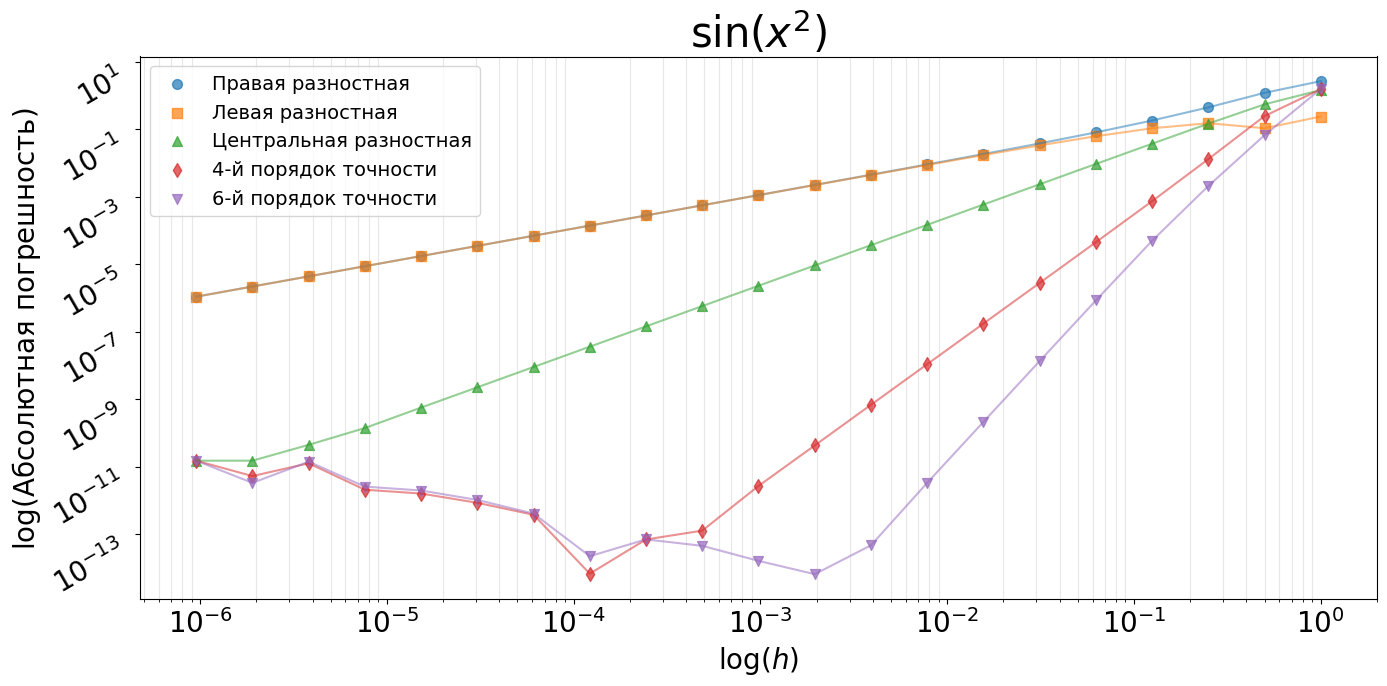

## График 2: $\cos(\sin(x))$

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 2.06e-07 | 9.54e-07 | 21 |
| Левая разностная | 2.06e-07 | 9.54e-07 | 21 |
| Центральная разностная | 2.60e-12 | 3.81e-06 | 19 |
| 4-й порядок точности | 4.24e-14 | 4.88e-04 | 12 |
| 6-й порядок точности | 6.05e-15 | 3.91e-03 | 9 |

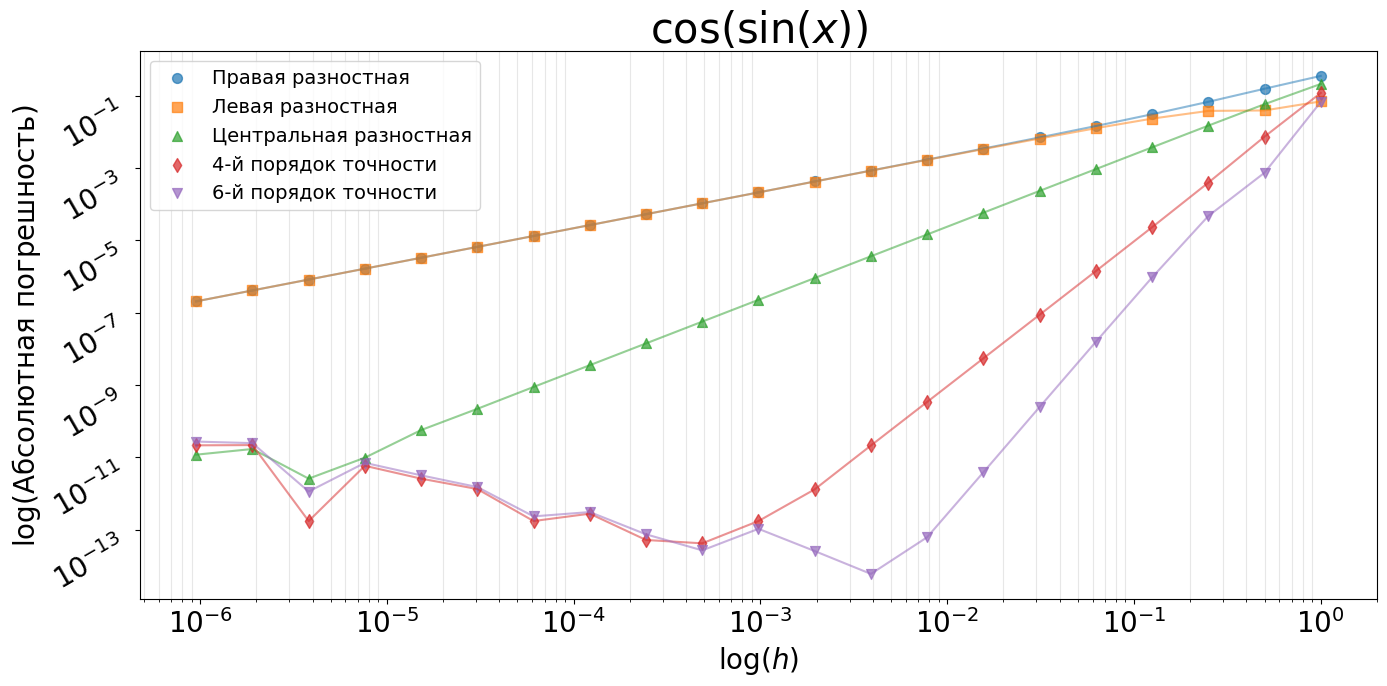

## График 3: $e^{\sin(\cos(x))}$

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 2.45e-07 | 9.54e-07 | 21 |
| Левая разностная | 2.45e-07 | 9.54e-07 | 21 |
| Центральная разностная | 7.01e-12 | 3.81e-06 | 19 |
| 4-й порядок точности | 7.82e-14 | 4.88e-04 | 12 |
| 6-й порядок точности | 2.44e-15 | 3.91e-03 | 9 |

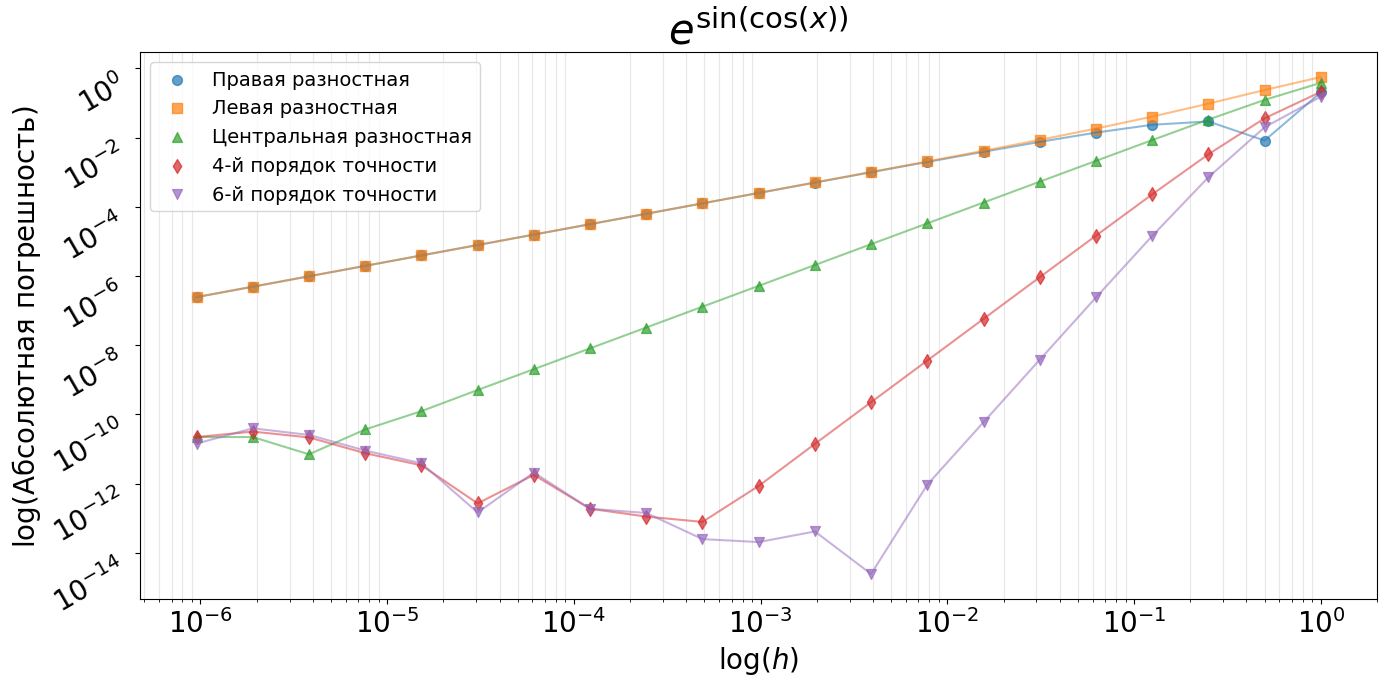

## График 4: $\ln(x+3)$

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 2.98e-08 | 9.54e-07 | 21 |
| Левая разностная | 2.98e-08 | 9.54e-07 | 21 |
| Центральная разностная | 0.00e+00 | 1.53e-05 | 17 |
| 4-й порядок точности | 0.00e+00 | 7.63e-06 | 18 |
| 6-й порядок точности | 0.00e+00 | 7.63e-06 | 18 |

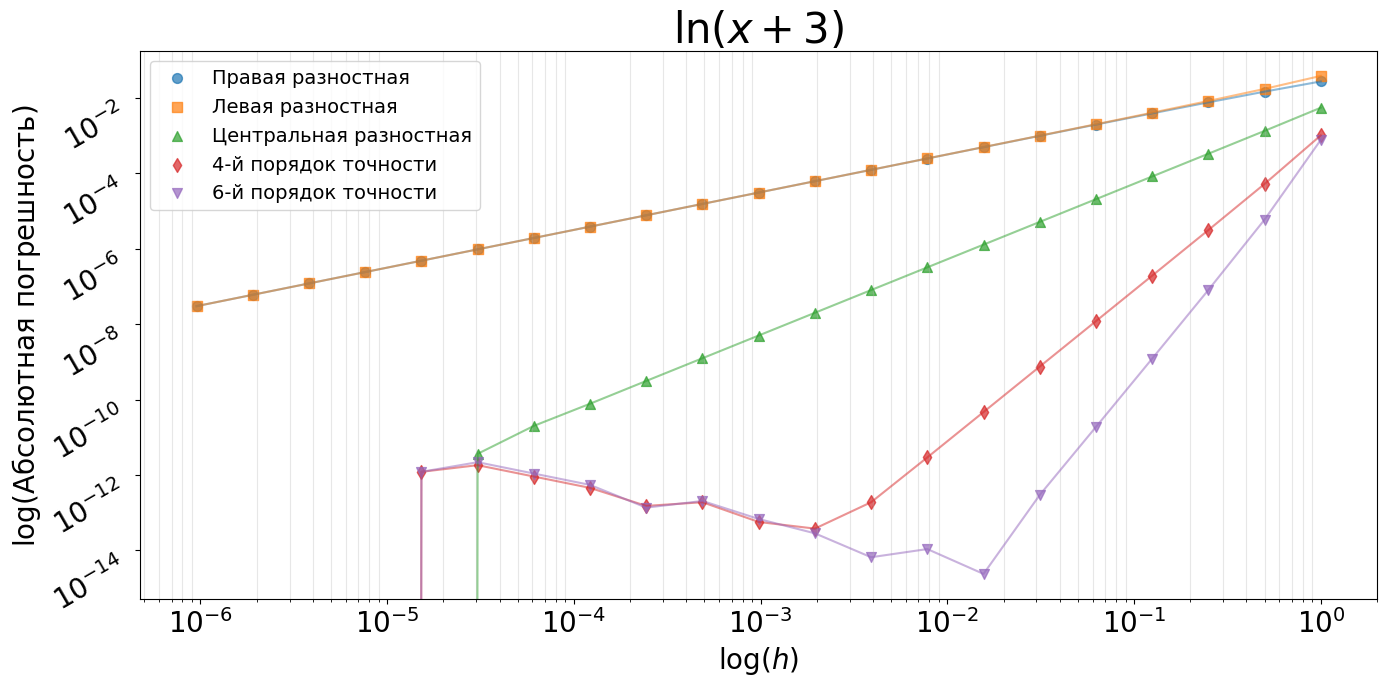

## График 5: $\sqrt{x+3}$

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 1.49e-08 | 9.54e-07 | 21 |
| Левая разностная | 1.49e-08 | 9.54e-07 | 21 |
| Центральная разностная | 0.00e+00 | 3.05e-05 | 16 |
| 4-й порядок точности | 0.00e+00 | 1.95e-03 | 10 |
| 6-й порядок точности | 0.00e+00 | 2.44e-04 | 13 |

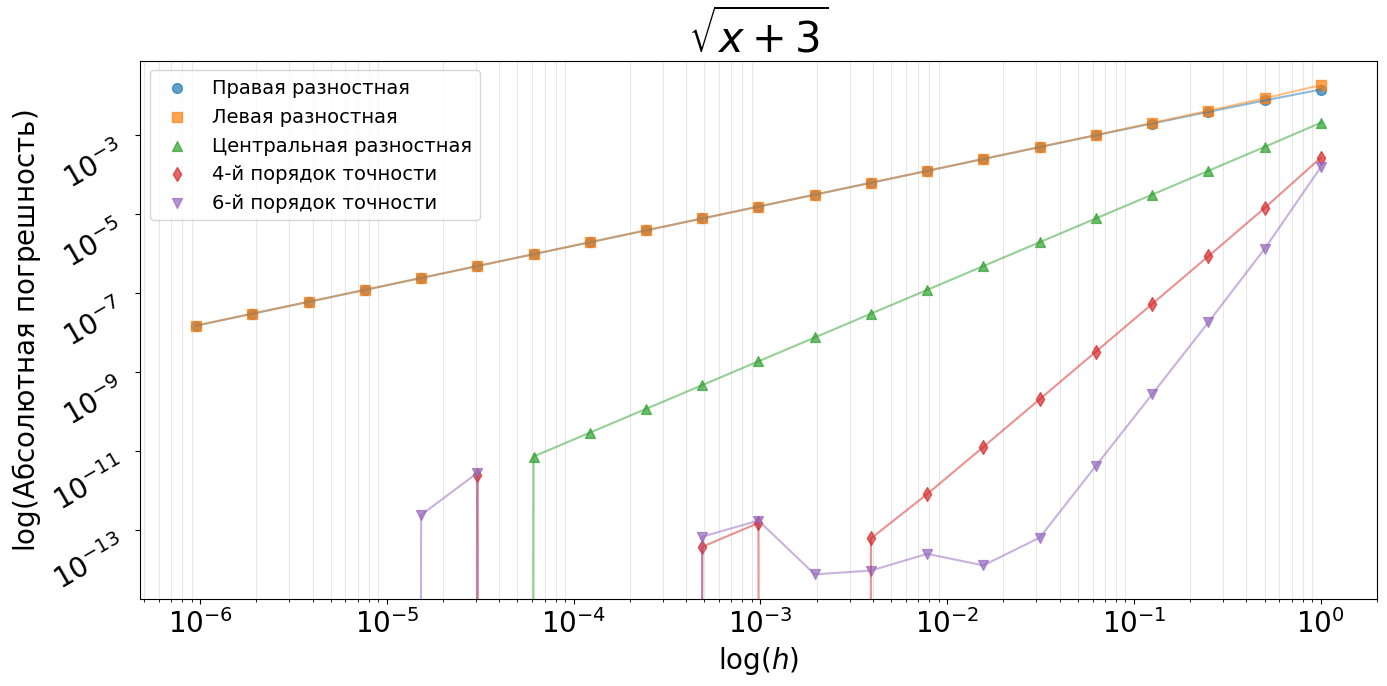

## Сравнительный анализ

Центральная разностная схема для всех функций:
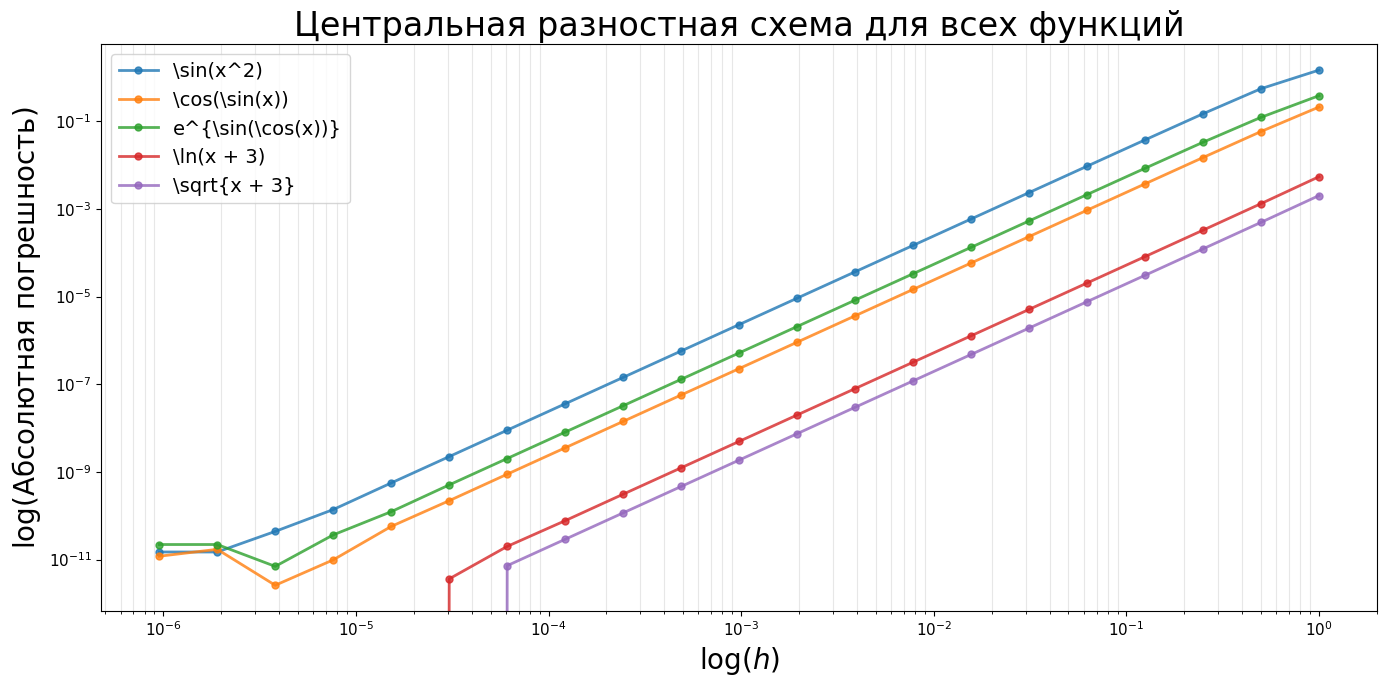

## Выводы

1. Подтверждены теоретические порядки точности методов
2. При $h < 10^{-5}$ начинают доминировать ошибки округления
3. Оптимальный шаг зависит от порядка метода:
   - Методы 1-го порядка: $h \approx 10^{-8} - 10^{-6}$
   - Центральная разностная: $h \approx 10^{-6} - 10^{-4}$
   - Метод 4-го порядка: $h \approx 10^{-4} - 10^{-3}$
   - Метод 6-го порядка: $h \approx 10^{-3} - 10^{-2}$